# ニューラルネットワーク

In [1]:
include("neural_networks.jl")
using .neural_networks.neural_networks_layer
using .neural_networks.neural_networks_optimizer

include("../functions/metrics.jl")
include("../functions/utils.jl")
using .metrics: accuracy
using .utils: DataLoader, next, len

## 問題：0, 1画像の2値分類
MNISTから0と1の画像のみを抽出し、それらを分類する。

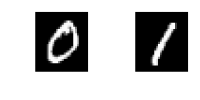

In [2]:
using Flux.Data.MNIST
using Plots

imgs = MNIST.images(:train)
labels = MNIST.labels(:train)

imgs_0 = imgs[labels .== 0]
imgs_1 = imgs[labels .== 1]
imgs_01 = vcat(imgs_0, imgs_1)

labels_0 = labels[labels .== 0]
labels_1 = labels[labels .== 1]

train_X = hcat(float.(vec.(imgs_01))...)'
train_t = vcat(labels_0, labels_1)

batch_size = 64

trainloader = DataLoader( (train_X, train_t) , batch_size )

l = @layout [a b]
plt1 = plot(imgs_0[1][end:-1:1, :], size=(100, 100), showaxis=false)
plt2 = plot(imgs_1[1][end:-1:1, :], size=(100, 100), showaxis=false)
plot( plt1, plt2, size=(200, 100), layout=l )

In [3]:
layers = [
    LinearLayer(784, 200),
    SigmoidLayer(),
    LinearLayer(200, 1),
    SigmoidLayer()
]

criterion = BinaryCrossEntropyLayer( )

optimizer = StochasticGradientDescent( layers );

In [4]:
using ProgressBars

n_epoch = 3
for epoch=1:n_epoch
    println("epoch: $epoch / $n_epoch")
    for _=ProgressBar(1:len(trainloader))
        X, t = next(trainloader)
        for layer=layers
            X = forward( layer, X )
        end
        
        E = forward( criterion, X, t )
        δ = backward( criterion )
        for layer=reverse(layers)
            δ = backward( layer, δ )
        end
    
        update( optimizer )
    end
    println()
end

epoch: 1 / 3
100.00%┣████████████████████████████████████████████████████████████┫ 197/197 14:27<00:00, 0.23 it/s]
epoch: 2 / 3
100.00%┣████████████████████████████████████████████████████████████┫ 197/197 14:25<00:00, 0.23 it/s]
epoch: 3 / 3
100.00%┣████████████████████████████████████████████████████████████┫ 197/197 14:23<00:00, 0.23 it/s]


In [5]:
test_imgs = MNIST.images(:test)
test_labels = MNIST.labels(:test)

test_imgs_0 = test_imgs[test_labels .== 0]
test_imgs_1 = test_imgs[test_labels .== 1]
test_imgs_01 = vcat(test_imgs_0, test_imgs_1)

test_labels_0 = test_labels[test_labels .== 0]
test_labels_1 = test_labels[test_labels .== 1]

test_X = hcat(float.(vec.(test_imgs_01))...)'
test_t = vcat(test_labels_0, test_labels_1)

for layer=layers
    test_X = forward( layer, test_X )
end

test_y = test_X .> 0.5

print("accuracy (test set): ")
println( accuracy( test_y , test_t ) )

accuracy (test set): 0.9692671394799054
